# Linear Regression

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('../data/weight-height.csv')

In [ ]:
df.head()

In [ ]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

In [ ]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [ ]:
def line(x, w=0, b=0):
    return x * w + b

In [ ]:
x = np.linspace(55, 80, 100)

In [ ]:
x

In [ ]:
yhat = line(x, w=0, b=0)

In [ ]:
yhat

In [ ]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

### Cost Function

In [ ]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [ ]:
X = df[['Height']].values
y_true = df['Weight'].values

In [ ]:
y_true

In [ ]:
y_pred = line(X)

In [ ]:
y_pred

In [ ]:
mean_squared_error(y_true, y_pred.ravel())

### you do it!

Try changing the values of the parameters b and w in the line above and plot it again to see how the plot and the cost  change.

In [ ]:
yhat = line(x, w=3, b=5)

In [ ]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

## Linear Regression with Keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(1, input_shape=(1,)))

In [ ]:
model.summary()

In [ ]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [ ]:
model.fit(X, y_true, epochs=40)

In [ ]:
y_pred = model.predict(X)

In [ ]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [ ]:
W, B = model.get_weights()

In [ ]:
W

In [ ]:
B

## Evaluating Model Performance

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [ ]:
len(X_train)

In [ ]:
len(X_test)

In [ ]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [ ]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [ ]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

In [ ]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

# Classification

In [ ]:
df = pd.read_csv('../data/user_visit_duration.csv')

In [ ]:
df.head()

In [ ]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

In [ ]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [ ]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
X = df[['Time (min)']].values
y = df['Buy'].values

model.fit(X, y, epochs=25)

In [ ]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [ ]:
temp_class = model.predict(temp) > 0.5

In [ ]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [ ]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

### Train/Test split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [ ]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))

In [ ]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [ ]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

## Cross Validation

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
cv = KFold(3, shuffle=True)

In [ ]:
scores = cross_val_score(model, X, y, cv=cv)

In [ ]:
scores

In [ ]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y, y_class_pred)

In [ ]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [ ]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y, y_class_pred))

## Feature Preprocessing

### Categorical Features

In [ ]:
df = pd.read_csv('../data/weight-height.csv')
df.head()

In [ ]:
df['Gender'].unique()

In [ ]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

## Feature Transformations

#### 1) Rescale with fixed factor

In [ ]:
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

In [ ]:
df.describe().round(2)

#### MinMax normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

#### 3) Standard normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

In [ ]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

# Machine Learning Exercises

## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

In [1]:
data = pd.read_csv("../data/housing-data.csv")

In [5]:
data.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


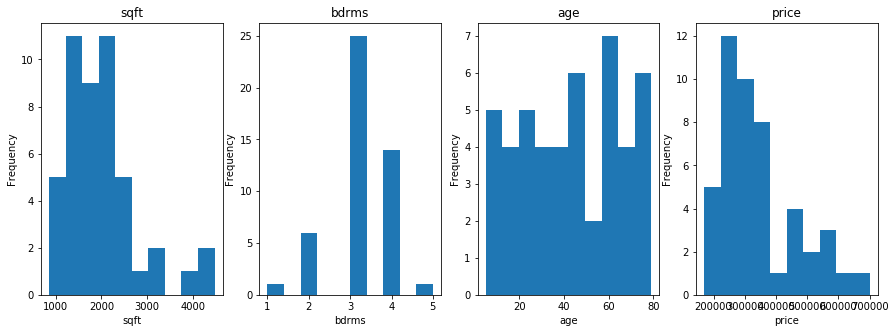

In [7]:
plt.figure(figsize =(15, 5))
for idx, fname in enumerate(["sqft", "bdrms", "age", "price"]):
    plt.subplot(1, 4, idx+1)
    data[fname].plot(kind="hist", title=fname)
    plt.xlabel(fname)

In [8]:
X = data[["sqft", "bdrms", "age"]].to_numpy()
y = data['price'].to_numpy()

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split

In [10]:
regressor = Sequential()
regressor.add(Dense(1, input_shape=(3,)))
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [24]:
regressor.compile(Adam(learning_rate=10), loss="mse", metrics=["mse"])

In [16]:
regressor.fit(X, y, batch_size=47, epochs=5)

Epoch 1/5
47/47 [==============================] - 0s 2ms/sample - loss: 43753205760.0000 - mse: 43753205760.0000
Epoch 2/5
47/47 [==============================] - 0s 32us/sample - loss: 35562229760.0000 - mse: 35562229760.0000
Epoch 3/5
47/47 [==============================] - 0s 77us/sample - loss: 28366503936.0000 - mse: 28366503936.0000
Epoch 4/5
47/47 [==============================] - 0s 54us/sample - loss: 22176454656.0000 - mse: 22176454656.0000
Epoch 5/5
47/47 [==============================] - 0s 58us/sample - loss: 16991367168.0000 - mse: 16991367168.0000


In [17]:
regressor.get_weights()

[array([[202.94746],
        [208.24857],
        [209.45921]], dtype=float32), array([214.13235], dtype=float32)]

In [18]:
data["sqft_rescale"] = data["sqft"] / 1000.0
data["age_rescale"] = data["age"] / 100.0
data["price_rescale"] = data["price"] / 10000.0
data.head()

,sqft,bdrms,age,price,sqft_rescale,age_rescale,price_rescale
0,2104,3,70,399900,2.104,0.70,39.99
1,1600,3,28,329900,1.600,0.28,32.99
2,2400,3,44,369000,2.400,0.44,36.90
3,1416,2,49,232000,1.416,0.49,23.20
4,3000,4,75,539900,3.000,0.75,53.99


In [20]:
X_rescale = data[["sqft_rescale", "age_rescale", "bdrms"]]
y_rescale = data["price_rescale"]
X_train, X_test, y_train, y_test = train_test_split(X_rescale, y_rescale, test_size=0.2)

In [23]:
regressor.fit(X_train, y_train, epochs=50)
regressor.get_weights()

Epoch 1/50
37/37 [==============================] - 0s 2ms/sample - loss: 657026.7466 - mse: 657026.7500
Epoch 2/50
37/37 [==============================] - 0s 166us/sample - loss: 457200.3307 - mse: 457200.3125
Epoch 3/50
37/37 [==============================] - 0s 137us/sample - loss: 290697.5004 - mse: 290697.5000
Epoch 4/50
37/37 [==============================] - 0s 187us/sample - loss: 169360.0864 - mse: 169360.0781
Epoch 5/50
37/37 [==============================] - 0s 203us/sample - loss: 81840.6117 - mse: 81840.6172
Epoch 6/50
37/37 [==============================] - 0s 151us/sample - loss: 28033.1365 - mse: 28033.1367
Epoch 7/50
37/37 [==============================] - 0s 112us/sample - loss: 4341.4281 - mse: 4341.4282
Epoch 8/50
37/37 [==============================] - 0s 182us/sample - loss: 1227.2210 - mse: 1227.2211
Epoch 9/50
37/37 [==============================] - 0s 241us/sample - loss: 10097.2065 - mse: 10097.2061
Epoch 10/50
37/37 [==============================] - 

[array([[ 8.44547  ],
        [10.128756 ],
        [ 4.9197803]], dtype=float32), array([-7.156427], dtype=float32)]

In [25]:
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)


from sklearn.metrics import r2_score
print("The R2 score is {:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score is {:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score is 0.631
The R2 score is -1.231


## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. They would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).

In [26]:
data = pd.read_csv("../data/HR_comma_sep.csv")

In [27]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [29]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [38]:
data['left'].sum() / 14999

0.2380825388359224

In [50]:
data[["Work_accident", "left"]].groupby(['left']).count()

,Work_accident
left,
0,11428
1,3571


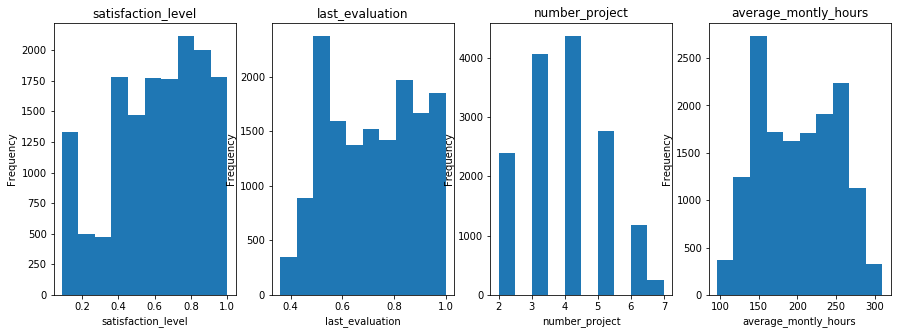

In [39]:
plt.figure(figsize =(15, 5))
for idx, fname in enumerate(["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours"]):
    plt.subplot(1, 4, idx+1)
    data[fname].plot(kind="hist", title=fname)
    plt.xlabel(fname)

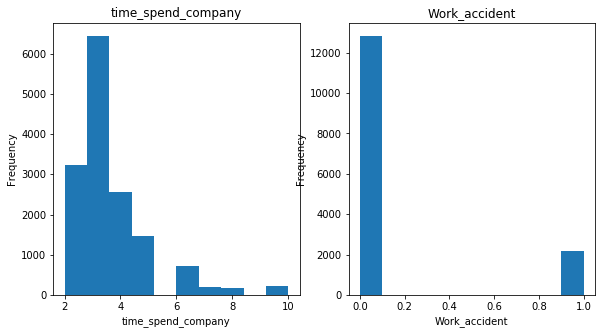

In [53]:
plt.figure(figsize = (15, 5))
for idx, feature in enumerate(["time_spend_company", "Work_accident"]):
    plt.subplot(1, 3, idx+1)
    data[feature].plot(kind="hist", title=feature)
    plt.xlabel(feature)

In [52]:
data[["left", "sales"]].groupby("sales").count()

,left
sales,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


In [57]:
df = pd.get_dummies(data)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales_IT                 14999 non-null uint8
sales_RandD              14999 non-null uint8
sales_accounting         14999 non-null uint8
sales_hr                 14999 non-null uint8
sales_management         14999 non-null uint8
sales_marketing          14999 non-null uint8
sales_product_mng        14999 non-null uint8
sales_sales              14999 non-null uint8
sales_support            14999 non-null uint8
sales_technical          14999 non-null uint8
salary_high              14999 non-null uint8
salary_low   

In [60]:
df["average_montly_hours_rescale"] = df["average_montly_hours"]/100

In [72]:
X = df.drop(["left", "average_montly_hours"], axis =1)
y = df[["left"]]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 20 columns):
satisfaction_level              14999 non-null float64
last_evaluation                 14999 non-null float64
number_project                  14999 non-null int64
time_spend_company              14999 non-null int64
Work_accident                   14999 non-null int64
promotion_last_5years           14999 non-null int64
sales_IT                        14999 non-null uint8
sales_RandD                     14999 non-null uint8
sales_accounting                14999 non-null uint8
sales_hr                        14999 non-null uint8
sales_management                14999 non-null uint8
sales_marketing                 14999 non-null uint8
sales_product_mng               14999 non-null uint8
sales_sales                     14999 non-null uint8
sales_support                   14999 non-null uint8
sales_technical                 14999 non-null uint8
salary_high                     14999 n

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [81]:
print("training data shape  :{}".format(X_train.shape))
print("training label shape :{}".format(y_train.shape))
print("test data shape      :{}".format(X_test.shape))
print("test label shape     :{}".format(X_test.shape))

training data shape  :(11999, 20)
training label shape :(11999, 1)
test data shape      :(3000, 20)
test label shape     :(3000, 20)


In [85]:
y_test.sum() / 3000

left    0.240667
dtype: float64

In [88]:
classifer = Sequential()
classifer.add(Dense(1, input_shape=(20,), activation="sigmoid"))
classifer.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [91]:
from tensorflow.keras import losses

In [147]:
classifer.compile(SGD(learning_rate=0.01), loss=losses.binary_crossentropy, metrics=['accuracy'])

In [127]:
classifer.fit(X_train, y_train, epochs=20)

Epoch 1/20
11999/11999 [==============================] - 0s 37us/sample - loss: 0.4431
Epoch 2/20
11999/11999 [==============================] - 0s 37us/sample - loss: 0.4417
Epoch 3/20
11999/11999 [==============================] - 0s 39us/sample - loss: 0.4405
Epoch 4/20
11999/11999 [==============================] - 0s 36us/sample - loss: 0.4397
Epoch 5/20
11999/11999 [==============================] - 0s 36us/sample - loss: 0.4387
Epoch 6/20
11999/11999 [==============================] - 0s 37us/sample - loss: 0.4377
Epoch 7/20
11999/11999 [==============================] - 0s 36us/sample - loss: 0.4369
Epoch 8/20
11999/11999 [==============================] - 0s 36us/sample - loss: 0.4361
Epoch 9/20
11999/11999 [==============================] - 0s 37us/sample - loss: 0.4357
Epoch 10/20
11999/11999 [==============================] - 0s 36us/sample - loss: 0.4350
Epoch 11/20
11999/11999 [==============================] - 0s 37us/sample - loss: 0.4344
Epoch 12/20
11999/11999 [=====

In [138]:
train_preds = classifer.predict(X_train) > 0.4
test_preds = classifer.predict(X_test) > 0.5

In [139]:
train_preds

array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [144]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.model_selection import cross_val_score, KFold

In [141]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

pretty_confusion_matrix(y_train, train_preds, ["not left", "left"])

,Predicted not left,Predicted left
not left,8154,996
left,1430,1419


In [142]:
accuracy_score(train_preds, y_train)

0.7978164847070589

In [143]:
precision_score(train_preds, y_train)

0.4980694980694981

In [152]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def build_logistic_regression_model():
    classifer = Sequential()
    classifer.add(Dense(1, input_shape=(20,), activation="sigmoid"))
    
    classifer.compile(SGD(learning_rate=0.05), loss=losses.binary_crossentropy, metrics=['accuracy'])
    return classifer

model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

cv = KFold(3, shuffle=True)
cross_val_score(model, X_train, y_train, scoring="accuracy", cv=cv)

array([0.80075  , 0.782    , 0.7731933])

In [158]:
model.fit(X_train, y_train)

In [166]:
y_test_preds = model.predict(X_test)
y_test_preds

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [167]:
pretty_confusion_matrix(y_pred=y_test_preds, y_true=y_test)

,Predicted False,Predicted True
False,2089,189
True,468,254


In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.



Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.986 (+/-0.016) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.959 (+/-0.029) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.026) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.025) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.025) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.975 (+/-0.014) for {'C': 1, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 10, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 100, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model 

In [2]:
clf.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)